### 图像的基本变换
+ Task.1 图像平移
+ Task.2 图像水平镜像
+ Task.3 图像垂直镜像
+ Task.4 图像旋转

In [5]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class ImgProcess:
    def __init__(self,srcImg,center=[0,0]) -> None:
        self.srcImg = srcImg
        self.center = center
        self.rows,self.cols,self.channels = self.srcImg.shape
    # 平移
    # 1 0 dx
    # 0 1 dy
    # 0 0 1
    def translate(self,delta_x,delta_y) -> cv2.Mat:
        self.transform = np.array([[1,0,delta_x],[0,1,delta_y],[0,0,1]])
        return self.process()
    # 水平镜像
    # 1 0  0
    # 0 -1 cols-1
    # 0 0  1
    def horizental(self) -> cv2.Mat:
        self.transform = np.array([[1,0,0],[0,-1,self.cols-1],[0,0,1]])
        return self.process()

    # 垂直镜像
    # -1  0 rows-1
    #  0  1 0
    #  0  0 1    
    def vertically(self) -> cv2.Mat:
        self.transform = np.array([[-1,0,self.rows-1],[0,1,0],[0,0,1]])
        return self.process()

    # 旋转
    def bilinear_rotate(self,theta) -> cv2.Mat:
        H, W, channel = self.srcImg.shape
    
        pi = math.pi
        #theta = random.randint(0,360)
        angle = theta * pi / 180
    
        matrix1 = np.array([[1, 0, 0],
                            [0, -1, 0],
                            [-0.5 * H, 0.5 * W, 1]])
    
        matrix2 = np.array([[math.cos(angle), -math.sin(angle), 0],
                            [math.sin(angle), math.cos(angle), 0],
                            [0, 0, 1]])
    
        matrix3 = np.array([[1, 0, 0],
                            [0, -1, 0],
                            [0.5 * H, 0.5 * W, 1]])
    
        new_data = np.zeros_like(self.srcImg,dtype=np.uint8)
    
        for i in range(H):
            for j in range(W):
    
                dot1 = np.matmul(np.array([i, j, 1]), matrix1)
                dot2 = np.matmul(dot1, matrix2)
                dot3 = np.matmul(dot2, matrix3)
    
                new_coordinate = dot3
    
                new_i = int(math.floor(new_coordinate[0]))
                new_j = int(math.floor(new_coordinate[1]))
    
                u = new_coordinate[0] - new_i
                v = new_coordinate[1] - new_j
    
                if new_j>=W or new_i >=H or new_i<1 or new_j<1 or (i+1)>=H or (j+1)>=W:
                    continue
    
                if (new_i + 1)>=H or (new_j+1)>=W:
                    new_data[i, j, :] = self.srcImg[new_i,new_j, :]
    
                else:
                    new_data[i, j, :] = (1-u)*(1-v)*self.srcImg[new_i,new_j, :] + \
                                    (1-u)*v*self.srcImg[new_i,new_j+1, :] + \
                                    u*(1-v)*self.srcImg[new_i+1,new_j, :] +\
                                    u*v*self.srcImg[new_i+1,new_j+1, :]
        return new_data


    def process(self) -> cv2.Mat:
        self.dstImg = np.zeros_like(self.srcImg,dtype=np.uint8)
        for i in range(self.rows):
            for j in range(self.cols):
                src_pos =  np.array([i-self.center[0],j-self.center[1],1])
                [x,y,z] = np.dot(self.transform,src_pos)
                x = int(x+0.5) + self.center[0]
                y = int(y+0.5) + self.center[1]

                if x >= self.rows or y >= self.cols or x < 0 or y < 0:
                    self.dstImg[i][j][:] = 255
                else:
                    self.dstImg[i][j][:] = self.srcImg[x][y][:]
        return self.dstImg

In [7]:
srcImg = cv2.imread('Fig0212Plane.bmp')
img = ImgProcess(srcImg)
translateImg = img.translate(20,40)
horizentalImg = img.horizental()
verticallyImg = img.vertically()
rotateImg = img.bilinear_rotate(45)

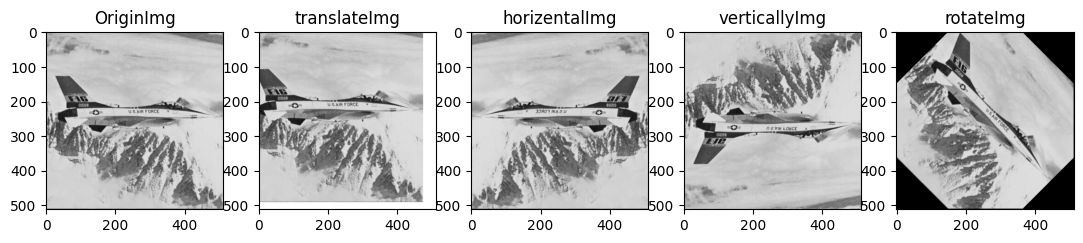

In [8]:
# cv2.imwrite("Fig0212Plane_translate.bmp",translateImg)
# cv2.imwrite("Fig0212Plane_horizental.bmp",horizentalImg)
# cv2.imwrite("Fig0212Plane_verticallImg.bmp",verticallyImg)
# cv2.imwrite("Fig0212Plane_rotate.bmp",rotateImg)

#可视化：
plt.figure(figsize=(16,5))
plt.subplot(161),plt.imshow(srcImg) 
plt.title("OriginImg")  
plt.subplot(162),plt.imshow(translateImg) 
plt.title("translateImg") 
plt.subplot(163),plt.imshow(horizentalImg) 
plt.title("horizentalImg") 
plt.subplot(164),plt.imshow(verticallyImg) 
plt.title("verticallyImg") 
plt.subplot(165),plt.imshow(rotateImg) 
plt.title("rotateImg") 
plt.show()